In [1]:
import math as mt
import malzememodelleri as md

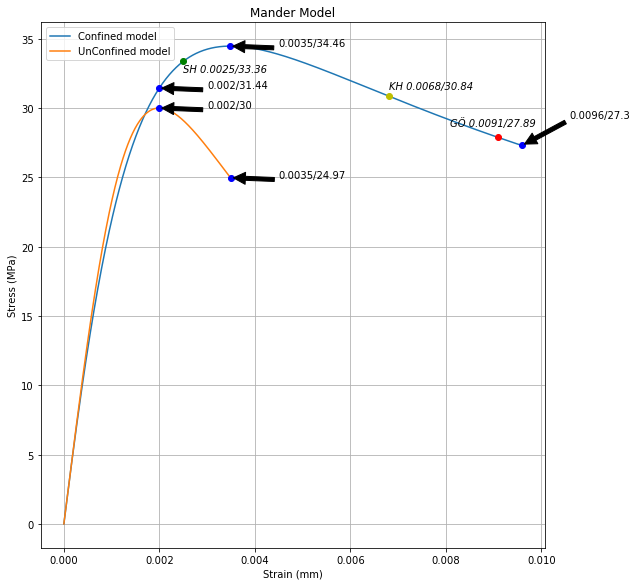

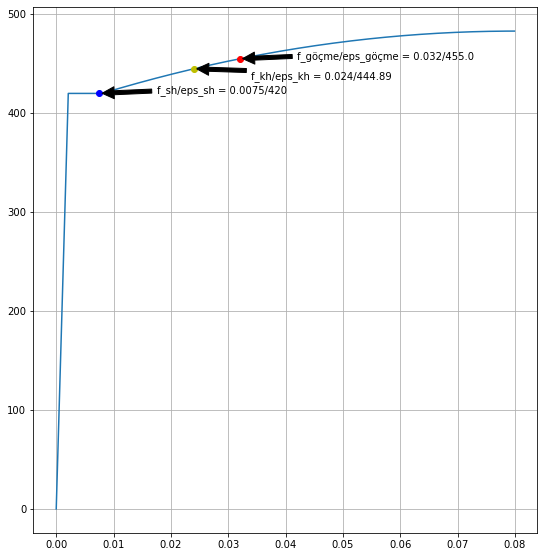

In [2]:
f_ywd = 420
f_co = 30 #MPa
b=300
h=500
s=150
A_s = 3142
etriye_çapı = 10
boyuna_donatı_çapı = 20
pas_payı = 30
baslık_donatı_adeti = 4
gövde_donatı_adeti =1
x_koladeti = 2
y_koladeti = 3
x,y =md.tbdy_mander("S420",f_co,b,h,s,A_s,etriye_çapı,boyuna_donatı_çapı,pas_payı,baslık_donatı_adeti,gövde_donatı_adeti,x_koladeti,y_koladeti,annotate=1)
eps,fs = md.celik_modeli("S420")